In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [198]:
# from google.colab import drive
# drive.mount('/content/drive')

In [199]:
# dfs = pd.read_csv("/content/drive/MyDrive/ds project/sales.csv")
# dfw = pd.read_csv("/content/drive/MyDrive/ds project/weather.csv")
# dff = pd.read_csv("/content/drive/MyDrive/ds project/fuel pricing.csv")
dfs = pd.read_csv("sales.csv")
dfw = pd.read_csv("weather.csv")
dff = pd.read_csv("fuel pricing.csv")

In [200]:
dfs

,Store,Category,Date,Weekly_Sales,Holiday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [201]:
dff

,Store,Date,Fuel_Price
0,1,2010-02-05,2.572
1,1,2010-02-12,2.548
2,1,2010-02-19,2.514
3,1,2010-02-26,2.561
4,1,2010-03-05,2.625
...,...,...,...
8185,45,2013-06-28,3.639
8186,45,2013-07-05,3.614
8187,45,2013-07-12,3.614
8188,45,2013-07-19,3.737


In [202]:
dfw

,Store,Date,Temperature
0,1,2010-02-05,42.31
1,1,2010-02-12,38.51
2,1,2010-02-19,39.93
3,1,2010-02-26,46.63
4,1,2010-03-05,46.50
...,...,...,...
8185,45,2013-06-28,76.05
8186,45,2013-07-05,77.50
8187,45,2013-07-12,79.37
8188,45,2013-07-19,82.84


##First, invistigating and cleaning Sales df

In [203]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Category      421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   Holiday       421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [204]:
dfs.head(10)

,Store,Category,Date,Weekly_Sales,Holiday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [205]:
dfs.tail(10)

,Store,Category,Date,Weekly_Sales,Holiday
421560,45,98,2012-08-24,415.40,False
421561,45,98,2012-08-31,346.04,False
421562,45,98,2012-09-07,352.44,True
421563,45,98,2012-09-14,605.96,False
421564,45,98,2012-09-21,467.30,False
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [206]:
dfs.describe()

,Store,Category,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


## There's negative values for sales which is invalid
## Data is right skewed.
## Standard variation is low, with acceptable range with respect to the max and min

In [207]:
dfs.isnull().sum()

Store           0
Category        0
Date            0
Weekly_Sales    0
Holiday         0
dtype: int64

In [208]:
dfs.duplicated().sum()

0

In [209]:
dfs[dfs['Weekly_Sales'] < 0]['Weekly_Sales'].count()

1285

In [210]:
dfs[dfs['Weekly_Sales'] == 0]['Weekly_Sales'].count()

73

In [211]:
dfs = dfs[dfs['Weekly_Sales'] > 0]

In [212]:
dfs.describe()

,Store,Category,Weekly_Sales
count,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591
std,12.787236,30.508819,22729.492116
min,1.000000,1.000000,0.010000
25%,11.000000,18.000000,2120.130000
50%,22.000000,37.000000,7661.700000
75%,33.000000,74.000000,20271.265000
max,45.000000,99.000000,693099.360000


In [213]:
dfs[(dfs['Weekly_Sales'] >= 0) & (dfs['Weekly_Sales'] < 1)]['Weekly_Sales'].count()

648

In [214]:
dfs = dfs[dfs['Weekly_Sales'] >= 1]

### Removed all records less than 1, their size isn't big enough to be significant, but not small enough to be overlooked.

In [215]:
dfs.describe()

,Store,Category,Weekly_Sales
count,419564.000000,419564.000000,419564.000000
mean,22.193577,44.230353,16057.876531
std,12.786596,30.497080,22738.296157
min,1.000000,1.000000,1.000000
25%,11.000000,18.000000,2139.490000
50%,22.000000,37.000000,7689.280000
75%,33.000000,74.000000,20300.582500
max,45.000000,99.000000,693099.360000


In [216]:
dfs.nunique()

Store               45
Category            81
Date               143
Weekly_Sales    358718
Holiday              2
dtype: int64

### No duplicatin and no null valeus in Sales df
### No incorrect datatypes
### No negative sales nor zero.

### A store have multiple categories, thus there's weekly sales for each category in a store

In [217]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Store       8190 non-null   int64  
 1   Date        8190 non-null   object 
 2   Fuel_Price  8190 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.1+ KB


In [218]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Store        8190 non-null   int64  
 1   Date         8190 non-null   object 
 2   Temperature  8190 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.1+ KB


In [219]:
# convert date column from string to dateTime

dfs['Date'] = pd.to_datetime(dfs['Date'])
dfw['Date'] = pd.to_datetime(dfw['Date'])
dff['Date'] = pd.to_datetime(dff['Date'])

In [220]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419564 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         419564 non-null  int64         
 1   Category      419564 non-null  int64         
 2   Date          419564 non-null  datetime64[ns]
 3   Weekly_Sales  419564 non-null  float64       
 4   Holiday       419564 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 16.4 MB


## Invitigating weather and fuel_prices df


In [221]:
dff.describe()

,Store,Date,Fuel_Price
count,8190.000000,8190,8190.000000
mean,23.000000,2011-10-31 12:00:00,3.405992
min,1.000000,2010-02-05 00:00:00,2.472000
25%,12.000000,2010-12-17 00:00:00,3.041000
50%,23.000000,2011-10-31 12:00:00,3.513000
75%,34.000000,2012-09-14 00:00:00,3.743000
max,45.000000,2013-07-26 00:00:00,4.468000
std,12.987966,NaN,0.431337


In [222]:
dff.head(10)

,Store,Date,Fuel_Price
0,1,2010-02-05,2.572
1,1,2010-02-12,2.548
2,1,2010-02-19,2.514
3,1,2010-02-26,2.561
4,1,2010-03-05,2.625
5,1,2010-03-12,2.667
6,1,2010-03-19,2.720
7,1,2010-03-26,2.732
8,1,2010-04-02,2.719
9,1,2010-04-09,2.770


In [223]:
dff.tail(10)

,Store,Date,Fuel_Price
8180,45,2013-05-24,3.627
8181,45,2013-05-31,3.646
8182,45,2013-06-07,3.633
8183,45,2013-06-14,3.632
8184,45,2013-06-21,3.626
8185,45,2013-06-28,3.639
8186,45,2013-07-05,3.614
8187,45,2013-07-12,3.614
8188,45,2013-07-19,3.737
8189,45,2013-07-26,3.804


In [224]:
dff.isnull().sum()

Store         0
Date          0
Fuel_Price    0
dtype: int64

In [225]:
dff.duplicated().sum()

0

### Fuel df is clean.
### No duplicates or nulls, and no negative values or zeros.
### No incorret datatypes.
### Standard variation is low, no skewness as mean and median are almost equal. 

In [226]:
dfw.describe()

,Store,Date,Temperature
count,8190.000000,8190,8190.000000
mean,23.000000,2011-10-31 12:00:00,59.356198
min,1.000000,2010-02-05 00:00:00,-7.290000
25%,12.000000,2010-12-17 00:00:00,45.902500
50%,23.000000,2011-10-31 12:00:00,60.710000
75%,34.000000,2012-09-14 00:00:00,73.880000
max,45.000000,2013-07-26 00:00:00,101.950000
std,12.987966,NaN,18.678607


In [227]:
dfw.head(10)

,Store,Date,Temperature
0,1,2010-02-05,42.31
1,1,2010-02-12,38.51
2,1,2010-02-19,39.93
3,1,2010-02-26,46.63
4,1,2010-03-05,46.50
5,1,2010-03-12,57.79
6,1,2010-03-19,54.58
7,1,2010-03-26,51.45
8,1,2010-04-02,62.27
9,1,2010-04-09,65.86


In [228]:
dfw.tail(10)

,Store,Date,Temperature
8180,45,2013-05-24,67.11
8181,45,2013-05-31,65.88
8182,45,2013-06-07,70.71
8183,45,2013-06-14,70.01
8184,45,2013-06-21,70.13
8185,45,2013-06-28,76.05
8186,45,2013-07-05,77.50
8187,45,2013-07-12,79.37
8188,45,2013-07-19,82.84
8189,45,2013-07-26,76.06


In [229]:
dfw.isnull().sum()

Store          0
Date           0
Temperature    0
dtype: int64

In [230]:
dfw.duplicated().sum()

0

In [231]:
dfw['Date'].dt.hour.unique()

array([0], dtype=int32)

### Weather data is clean
### No duplicates or nulls, no incorrect datatypes
### No skewness, as the mean and median are almost equal
### Negative values and zeros are normal to have

## Merging all dataframes to only one


In [232]:
merged_df = pd.merge(dfs, dfw, on=['Date','Store'], how='outer')
merged_df = pd.merge(merged_df, dff, on=['Date','Store'], how='outer')

In [233]:
merged_df

,Store,Category,Date,Weekly_Sales,Holiday,Temperature,Fuel_Price
0,1,1.0,2010-02-05,24924.50,False,42.31,2.572
1,1,2.0,2010-02-05,50605.27,False,42.31,2.572
2,1,3.0,2010-02-05,13740.12,False,42.31,2.572
3,1,4.0,2010-02-05,39954.04,False,42.31,2.572
4,1,5.0,2010-02-05,32229.38,False,42.31,2.572
...,...,...,...,...,...,...,...
421314,41,NaN,2013-07-26,NaN,NaN,67.56,3.582
421315,42,NaN,2013-07-26,NaN,NaN,83.32,3.865
421316,43,NaN,2013-07-26,NaN,NaN,79.13,3.620
421317,44,NaN,2013-07-26,NaN,NaN,83.62,3.669


In [234]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421319 entries, 0 to 421318
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421319 non-null  int64         
 1   Category      419564 non-null  float64       
 2   Date          421319 non-null  datetime64[ns]
 3   Weekly_Sales  419564 non-null  float64       
 4   Holiday       419564 non-null  object        
 5   Temperature   421319 non-null  float64       
 6   Fuel_Price    421319 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 22.5+ MB


In [235]:
merged_df.describe()

,Store,Category,Date,Weekly_Sales,Temperature,Fuel_Price
count,421319.000000,419564.000000,421319,419564.000000,421319.000000,421319.000000
mean,22.196936,44.230353,2011-06-20 19:35:35.353971456,16057.876531,60.051960,3.361661
min,1.000000,1.000000,2010-02-05 00:00:00,1.000000,-7.290000,2.472000
25%,11.000000,18.000000,2010-10-15 00:00:00,2139.490000,46.660000,2.934000
50%,22.000000,37.000000,2011-06-24 00:00:00,7689.280000,62.030000,3.452000
75%,33.000000,74.000000,2012-02-24 00:00:00,20300.582500,74.240000,3.738000
max,45.000000,99.000000,2013-07-26 00:00:00,693099.360000,101.950000,4.468000
std,12.787544,30.497080,NaN,22738.296157,18.453947,0.458073


In [236]:
merged_df.isnull().sum()

Store              0
Category        1755
Date               0
Weekly_Sales    1755
Holiday         1755
Temperature        0
Fuel_Price         0
dtype: int64

In [237]:
merged_df.duplicated().sum()

0

## Dropping null values, don't have to replace them as they are insignificant due to their size

In [238]:
merged_df = merged_df.dropna()

In [239]:
merged_df.isnull().sum()

Store           0
Category        0
Date            0
Weekly_Sales    0
Holiday         0
Temperature     0
Fuel_Price      0
dtype: int64

In [240]:
merged_df

,Store,Category,Date,Weekly_Sales,Holiday,Temperature,Fuel_Price
0,1,1.0,2010-02-05,24924.50,False,42.31,2.572
1,1,2.0,2010-02-05,50605.27,False,42.31,2.572
2,1,3.0,2010-02-05,13740.12,False,42.31,2.572
3,1,4.0,2010-02-05,39954.04,False,42.31,2.572
4,1,5.0,2010-02-05,32229.38,False,42.31,2.572
...,...,...,...,...,...,...,...
419559,45,93.0,2012-10-26,2487.80,False,58.85,3.882
419560,45,94.0,2012-10-26,5203.31,False,58.85,3.882
419561,45,95.0,2012-10-26,56017.47,False,58.85,3.882
419562,45,97.0,2012-10-26,6817.48,False,58.85,3.882


In [241]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419564 entries, 0 to 419563
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         419564 non-null  int64         
 1   Category      419564 non-null  float64       
 2   Date          419564 non-null  datetime64[ns]
 3   Weekly_Sales  419564 non-null  float64       
 4   Holiday       419564 non-null  object        
 5   Temperature   419564 non-null  float64       
 6   Fuel_Price    419564 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 25.6+ MB


### [ Holiday ] column was converted to string as there was null values after merging.
### Converting it back to bool datatype

In [242]:
merged_df.loc[:, 'Holiday'] = merged_df['Holiday'].astype(bool)

In [243]:
merged_df.describe()

,Store,Category,Date,Weekly_Sales,Temperature,Fuel_Price
count,419564.000000,419564.000000,419564,419564.000000,419564.000000,419564.000000
mean,22.193577,44.230353,2011-06-18 04:01:40.424249856,16057.876531,60.074925,3.360749
min,1.000000,1.000000,2010-02-05 00:00:00,1.000000,-2.060000,2.472000
25%,11.000000,18.000000,2010-10-08 00:00:00,2139.490000,46.670000,2.933000
50%,22.000000,37.000000,2011-06-17 00:00:00,7689.280000,62.070000,3.452000
75%,33.000000,74.000000,2012-02-24 00:00:00,20300.582500,74.260000,3.737000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000
std,12.786596,30.497080,NaN,22738.296157,18.449282,0.458551


In [244]:
##################### Visualization #################

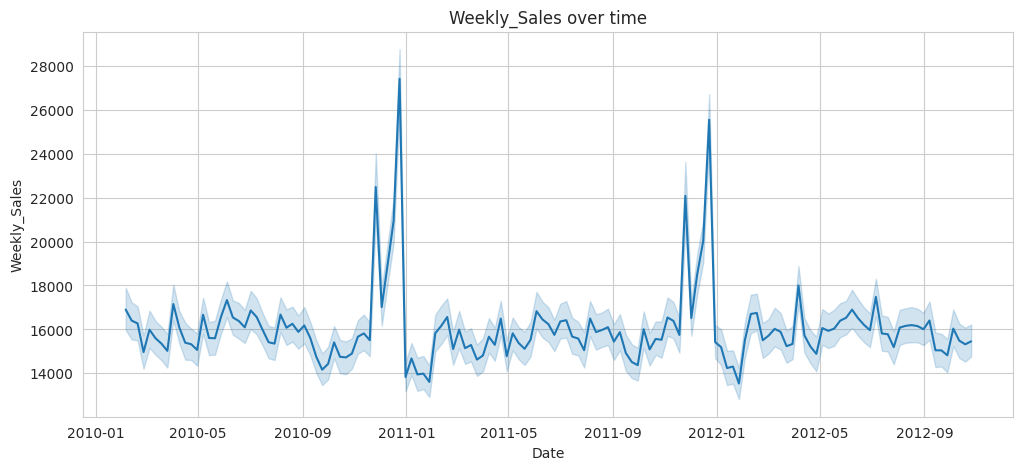

In [245]:
# task 2.1
fig, ax = plt.subplots(figsize=(12, 5))
plt.title('Weekly_Sales over time')
sns.lineplot(data=merged_df,x='Date', y='Weekly_Sales')
plt.show()

/tmp/ipykernel_9255/3369365736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Date_ordinal'] = pd.to_datetime(merged_df['Date']).apply(lambda date: date.toordinal())


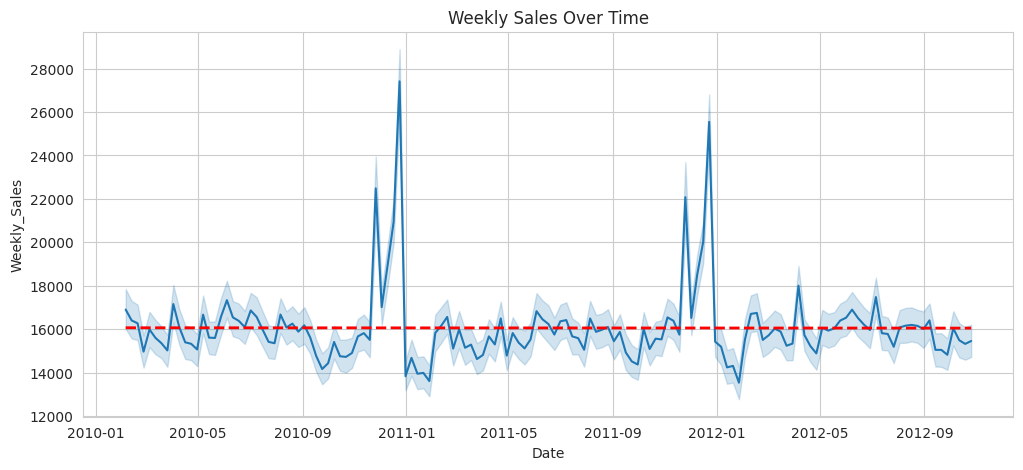

In [246]:
# same plot, adding a line showing the trend

fig, ax = plt.subplots(figsize=(12, 5))
plt.title('Weekly Sales Over Time')
sns.lineplot(data=merged_df, x='Date', y='Weekly_Sales', ax=ax)

# Convert Date to ordinal for regression
merged_df['Date_ordinal'] = pd.to_datetime(merged_df['Date']).apply(lambda date: date.toordinal())
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df['Date_ordinal'], merged_df['Weekly_Sales'])

# line equation
line = slope * merged_df['Date_ordinal'] + intercept

ax.plot(merged_df['Date'], line, color='red', linestyle='--', linewidth=2)

plt.show()


## Overall trend is neither increasing or decreasing

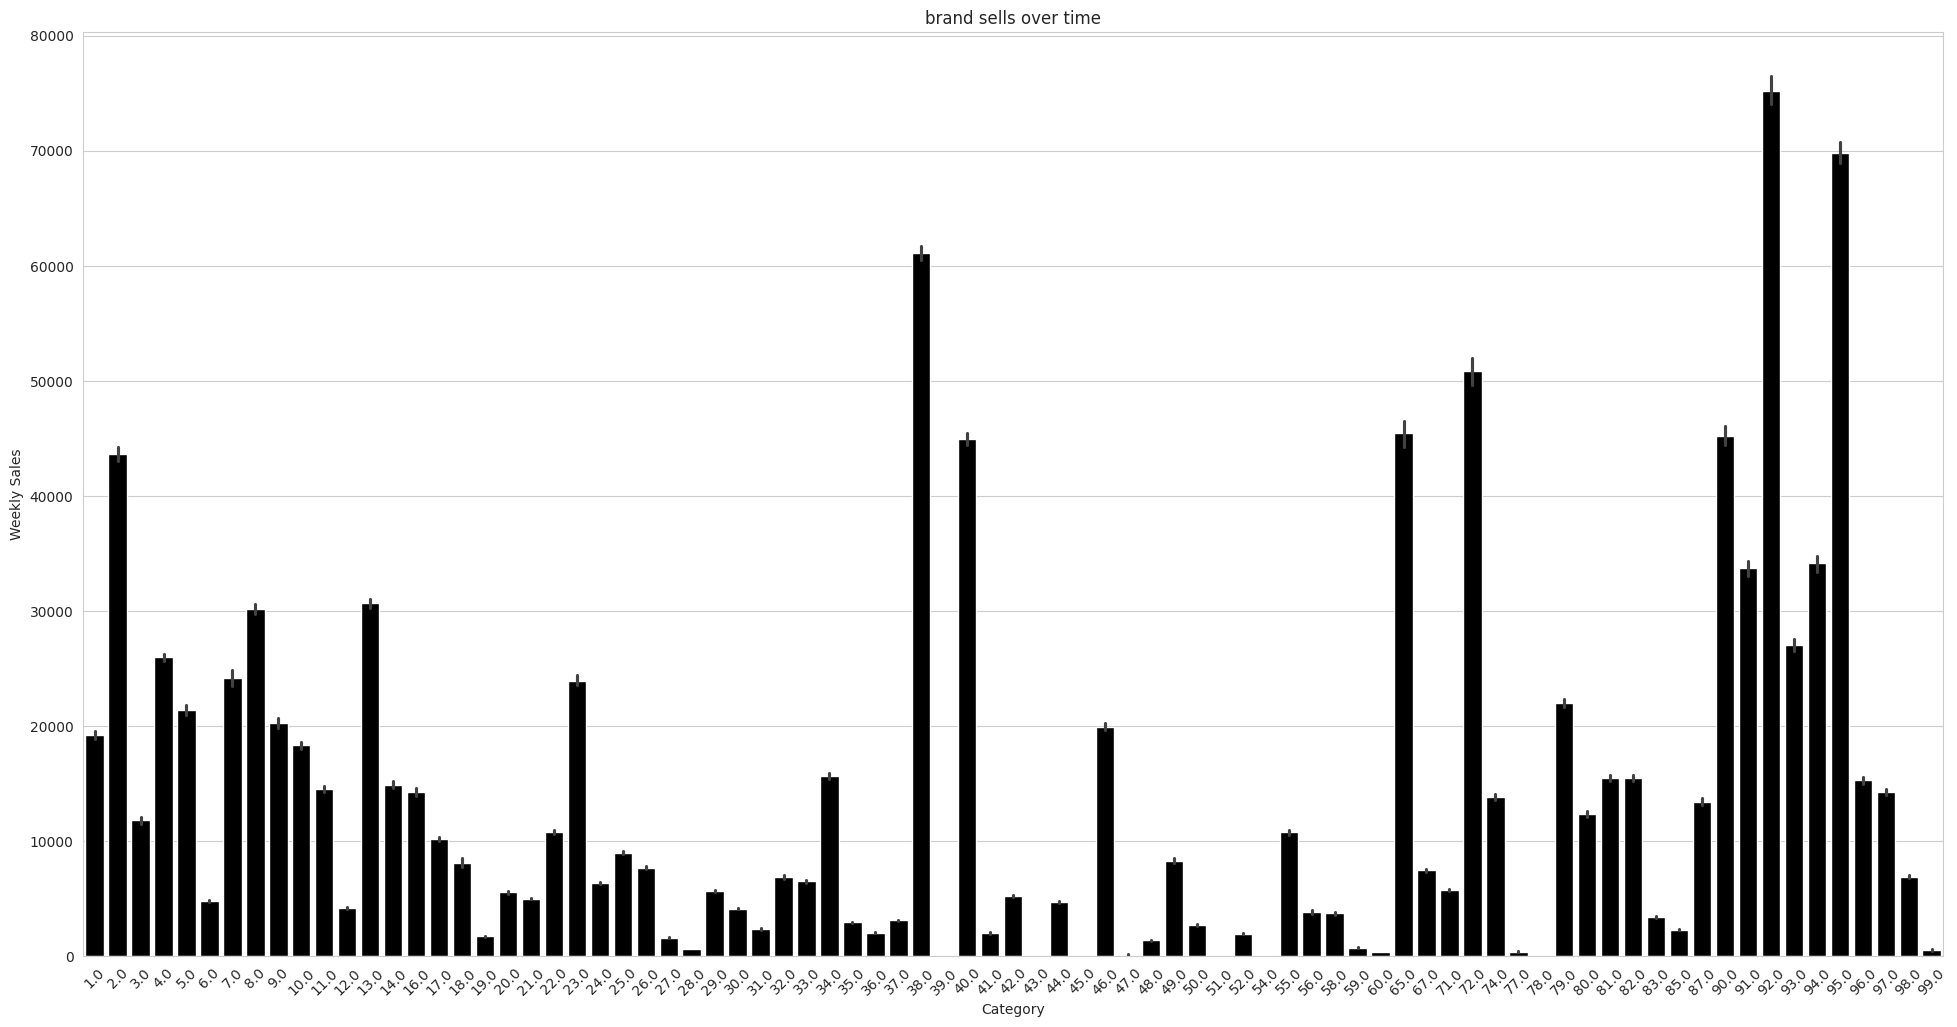

In [247]:
# task 2.2
fig, ax = plt.subplots(figsize=(24,12))
sns.barplot(data=merged_df,x='Category', y='Weekly_Sales',color='black')
plt.title('brand sells over time')
plt.xlabel('Category')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.show()

In [248]:
# task 2.3
store_sales = merged_df.groupby('Store')['Weekly_Sales'].sum()
top_ten_stores = store_sales.sort_values(ascending=False).head(10).reset_index()
print("Top Ten Selling Stores:")
print(top_ten_stores)

Top Ten Selling Stores:
   Store  Weekly_Sales
0     20  3.014014e+08
1      4  2.995453e+08
2     14  2.890019e+08
3     13  2.865179e+08
4      2  2.753872e+08
5     10  2.716241e+08
6     27  2.538572e+08
7      6  2.237586e+08
8      1  2.224068e+08
9     39  2.074465e+08


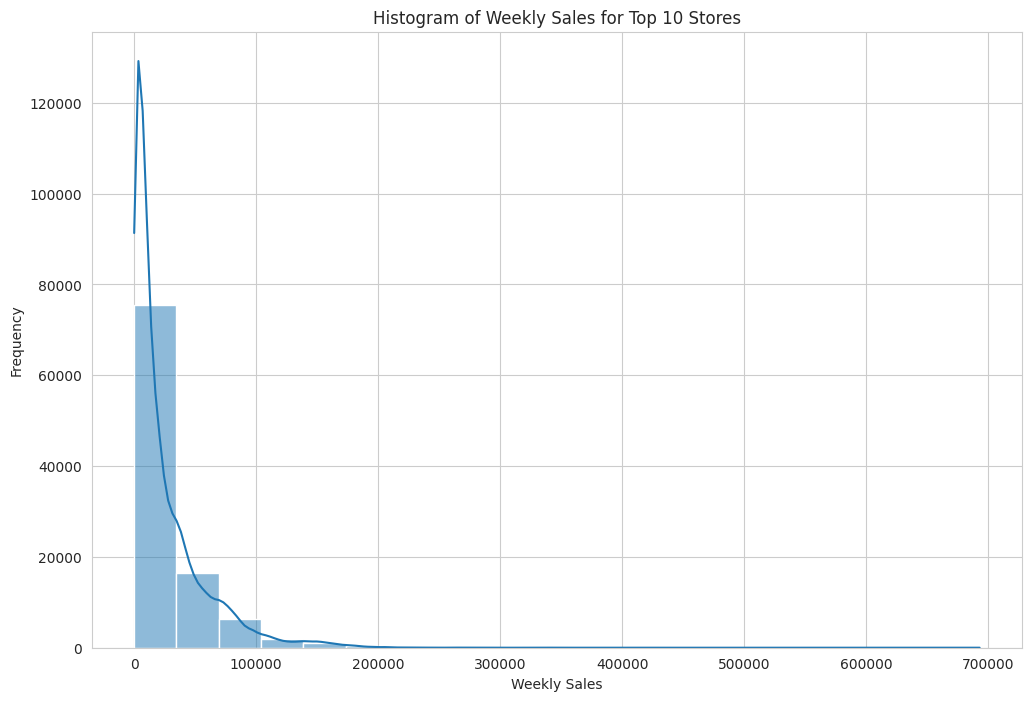

In [249]:
# 2.4
top_store_ids = top_stores['Store']
top_store_sales = merged_df[merged_df['Store'].isin(top_store_ids)]

plt.figure(figsize=(12, 8))
sns.histplot(data=top_store_sales, x='Weekly_Sales', bins=20, kde=True)
plt.title('Histogram of Weekly Sales for Top 10 Stores')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()


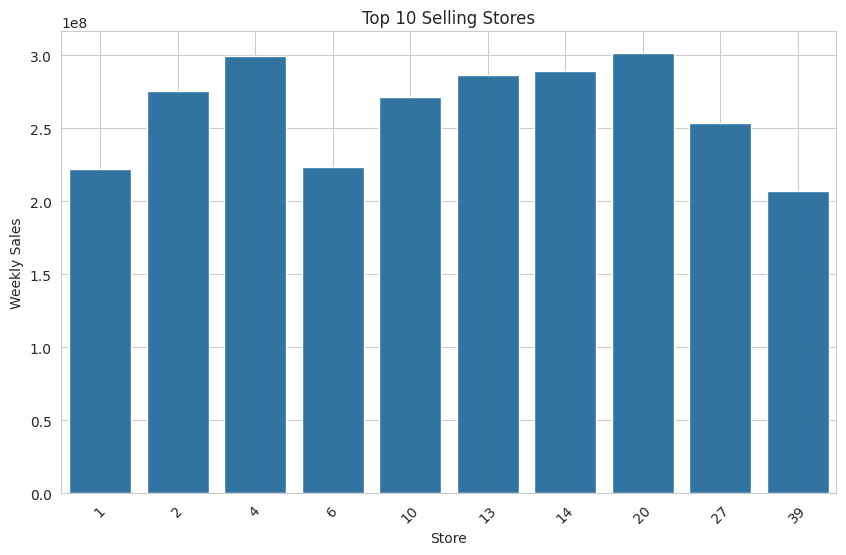

In [250]:
# 2.4

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=top_ten_stores)
plt.title('Top 10 Selling Stores')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


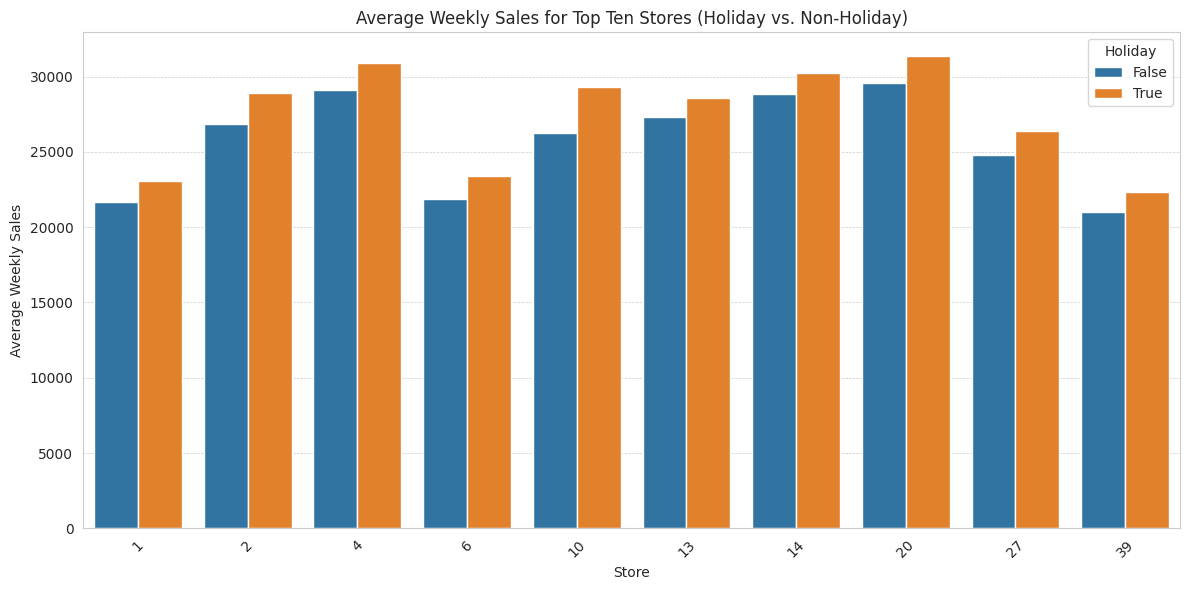

In [251]:
# 2.5
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='Store', y='Weekly_Sales', hue='Holiday', data=pd.concat([holiday_sales, non_holiday_sales]))

plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales for Top Ten Stores (Holiday vs. Non-Holiday)')
plt.xticks(rotation=45)

plt.legend(title='Holiday')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

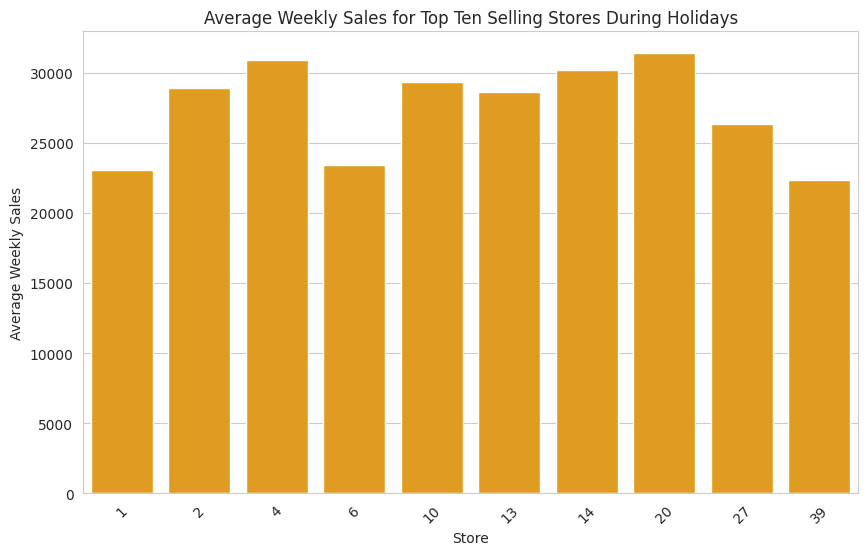

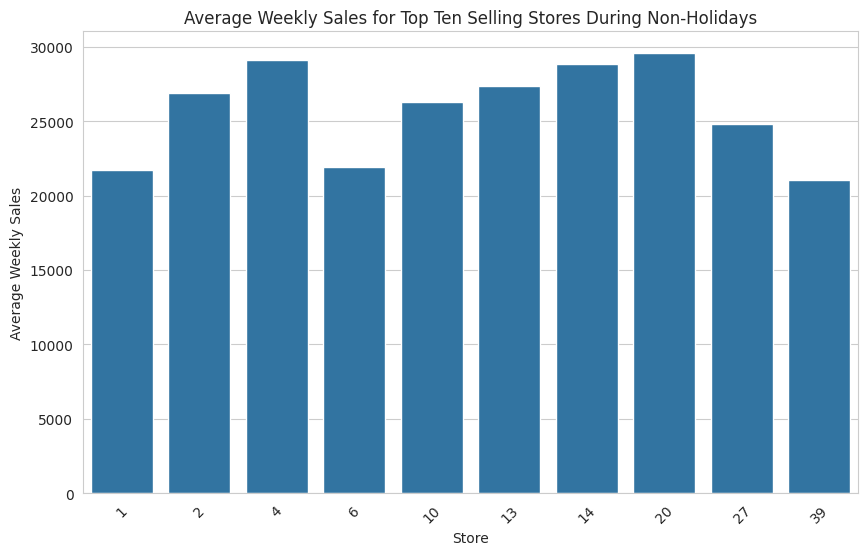

In [252]:
# 2.5
top_ten_stores = merged_df.groupby('Store')['Weekly_Sales'].sum().nlargest(10).index
top_stores_data = merged_df[merged_df['Store'].isin(top_ten_stores)]
avg_sales_by_holiday = top_stores_data.groupby(['Store', 'Holiday'])['Weekly_Sales'].mean().reset_index()
holiday_sales = avg_sales_by_holiday[avg_sales_by_holiday['Holiday'] == True]
non_holiday_sales = avg_sales_by_holiday[avg_sales_by_holiday['Holiday'] == False]
plt.figure(figsize=(10, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=holiday_sales, color='orange')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales for Top Ten Selling Stores During Holidays')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=non_holiday_sales)
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales for Top Ten Selling Stores During Non-Holidays')
plt.xticks(rotation=45)
plt.show()

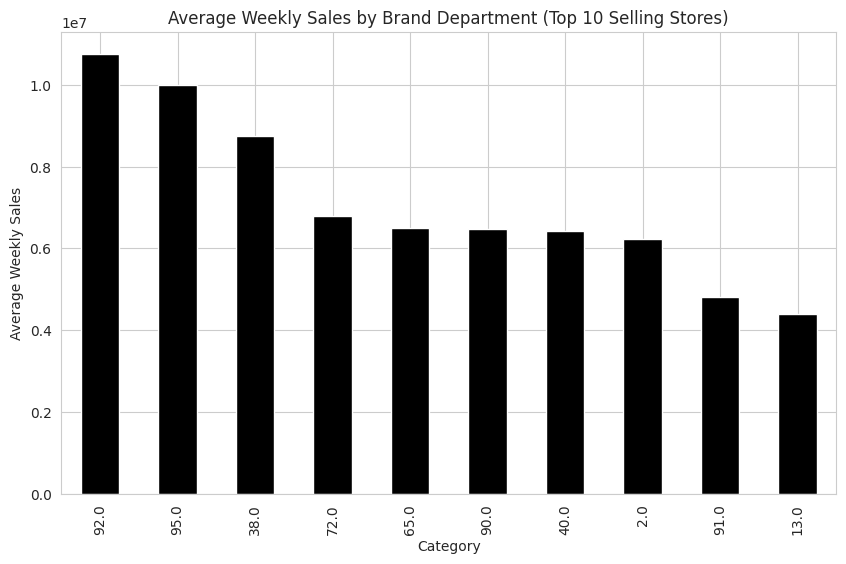

In [253]:
# task 2.6
weekly_sales_by_store_category = merged_df.groupby(['Store', 'Category'])['Weekly_Sales'].sum().reset_index()
average_weekly_sales_by_category = weekly_sales_by_store_category.groupby('Category')['Weekly_Sales'].mean()
top_10_categories = average_weekly_sales_by_category.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar', label='Non-Holiday', color='black')
plt.title('Average Weekly Sales by Brand Department (Top 10 Selling Stores)')
plt.xlabel('Category')
plt.ylabel('Average Weekly Sales')
plt.show()

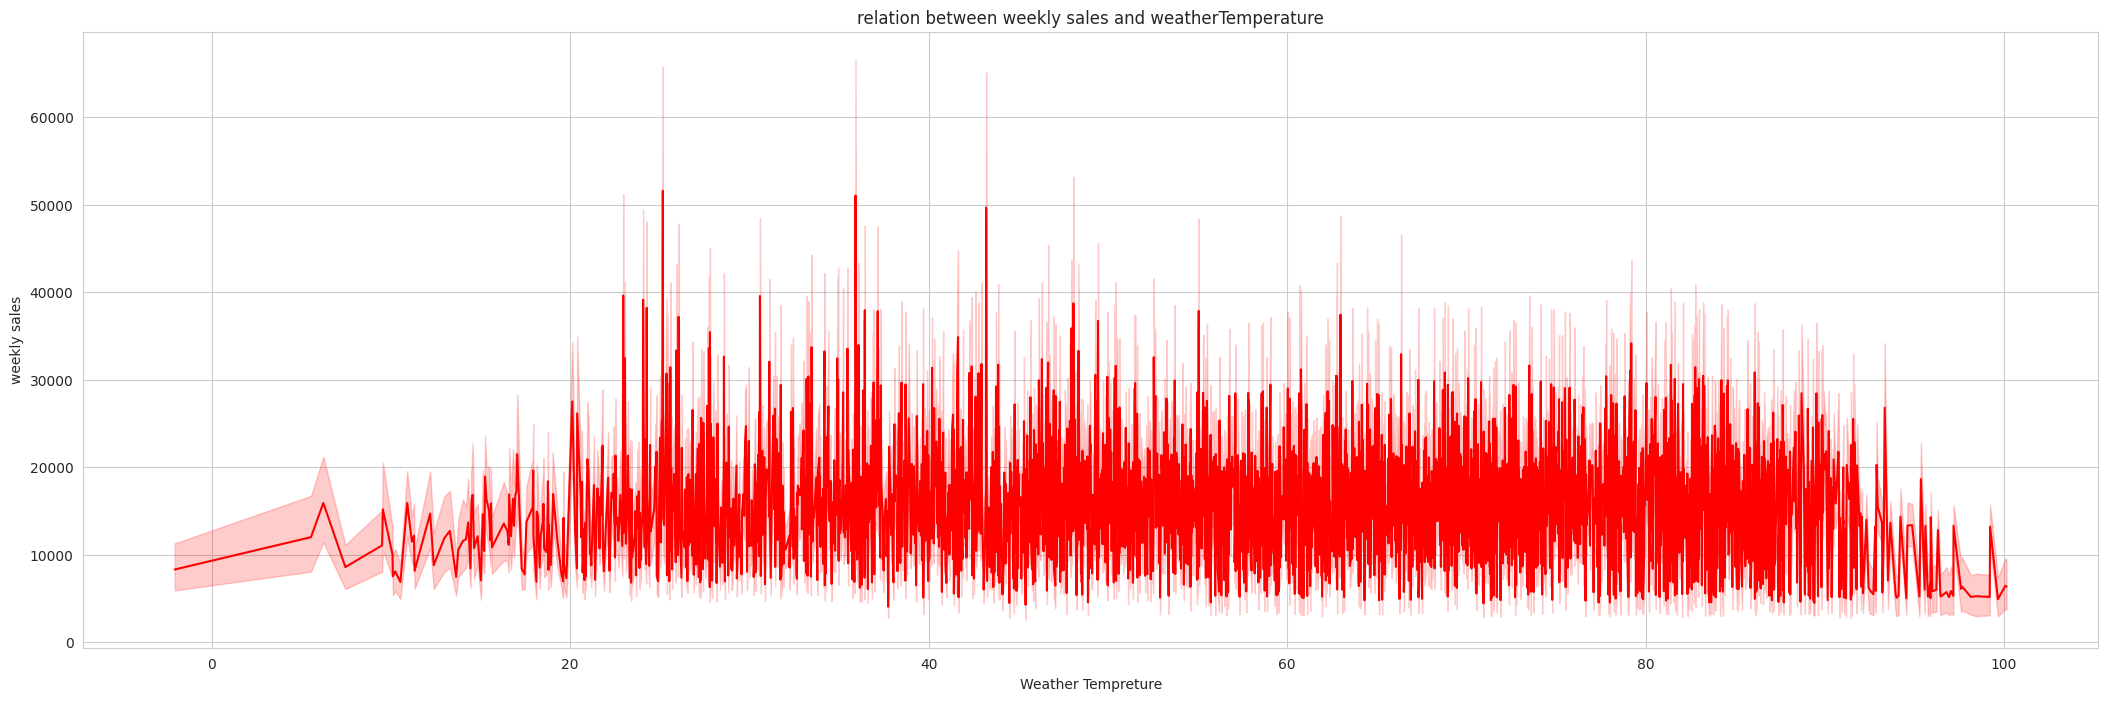

In [254]:
# task 2.7
plt.figure(figsize=(26, 8))
sns.lineplot(merged_df,x='Temperature',y='Weekly_Sales',color ='red')
plt.title('relation between weekly sales and weatherTemperature')
plt.xlabel('Weather Tempreture')
plt.ylabel('weekly sales')
plt.show()

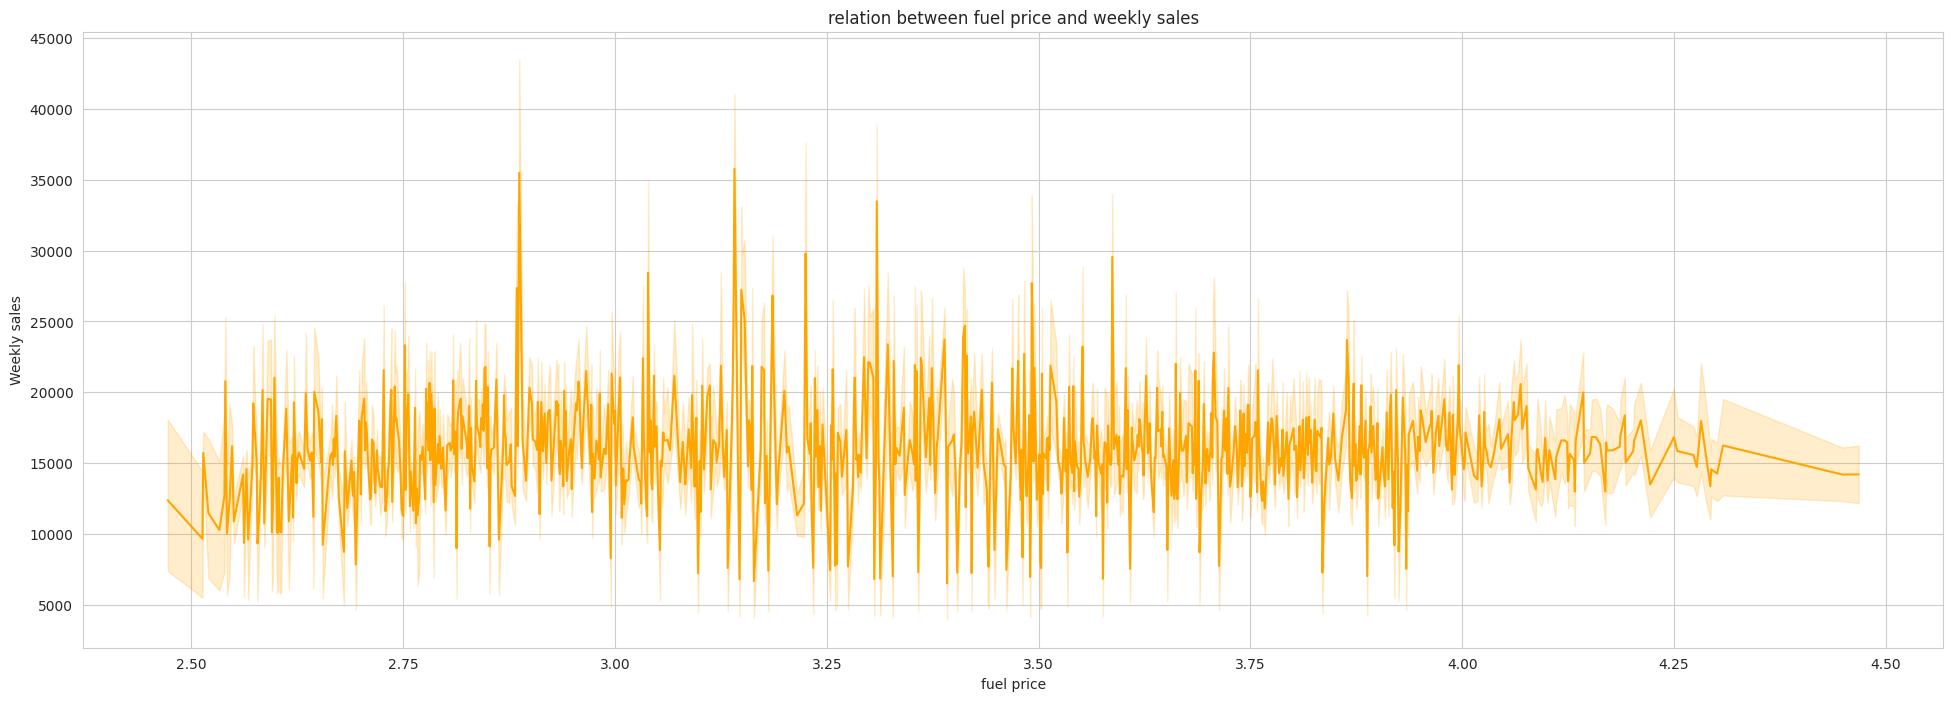

In [255]:
# task 2.8
plt.figure(figsize=(24, 8))
sns.lineplot(merged_df,x='Fuel_Price', y='Weekly_Sales', color ='orange')
plt.title('relation between fuel price and weekly sales')
plt.xlabel('fuel price')
plt.ylabel('Weekly sales')
plt.show()

In [256]:
merged_df['year'] = pd.to_datetime(merged_df['Date']).dt.year
merged_df['month'] = pd.to_datetime(merged_df['Date']).dt.month
merged_df['day_of_week'] = pd.to_datetime(merged_df['Date']).dt.day

merged_df.drop('Date', axis=1, inplace=True)


/tmp/ipykernel_9255/2385012748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['year'] = pd.to_datetime(merged_df['Date']).dt.year
/tmp/ipykernel_9255/2385012748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['month'] = pd.to_datetime(merged_df['Date']).dt.month
/tmp/ipykernel_9255/2385012748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [257]:
merged_df.nunique()

Store               45
Category            81
Weekly_Sales    358718
Holiday              2
Temperature       3528
Fuel_Price         892
Date_ordinal       143
year                 3
month               12
day_of_week         31
dtype: int64

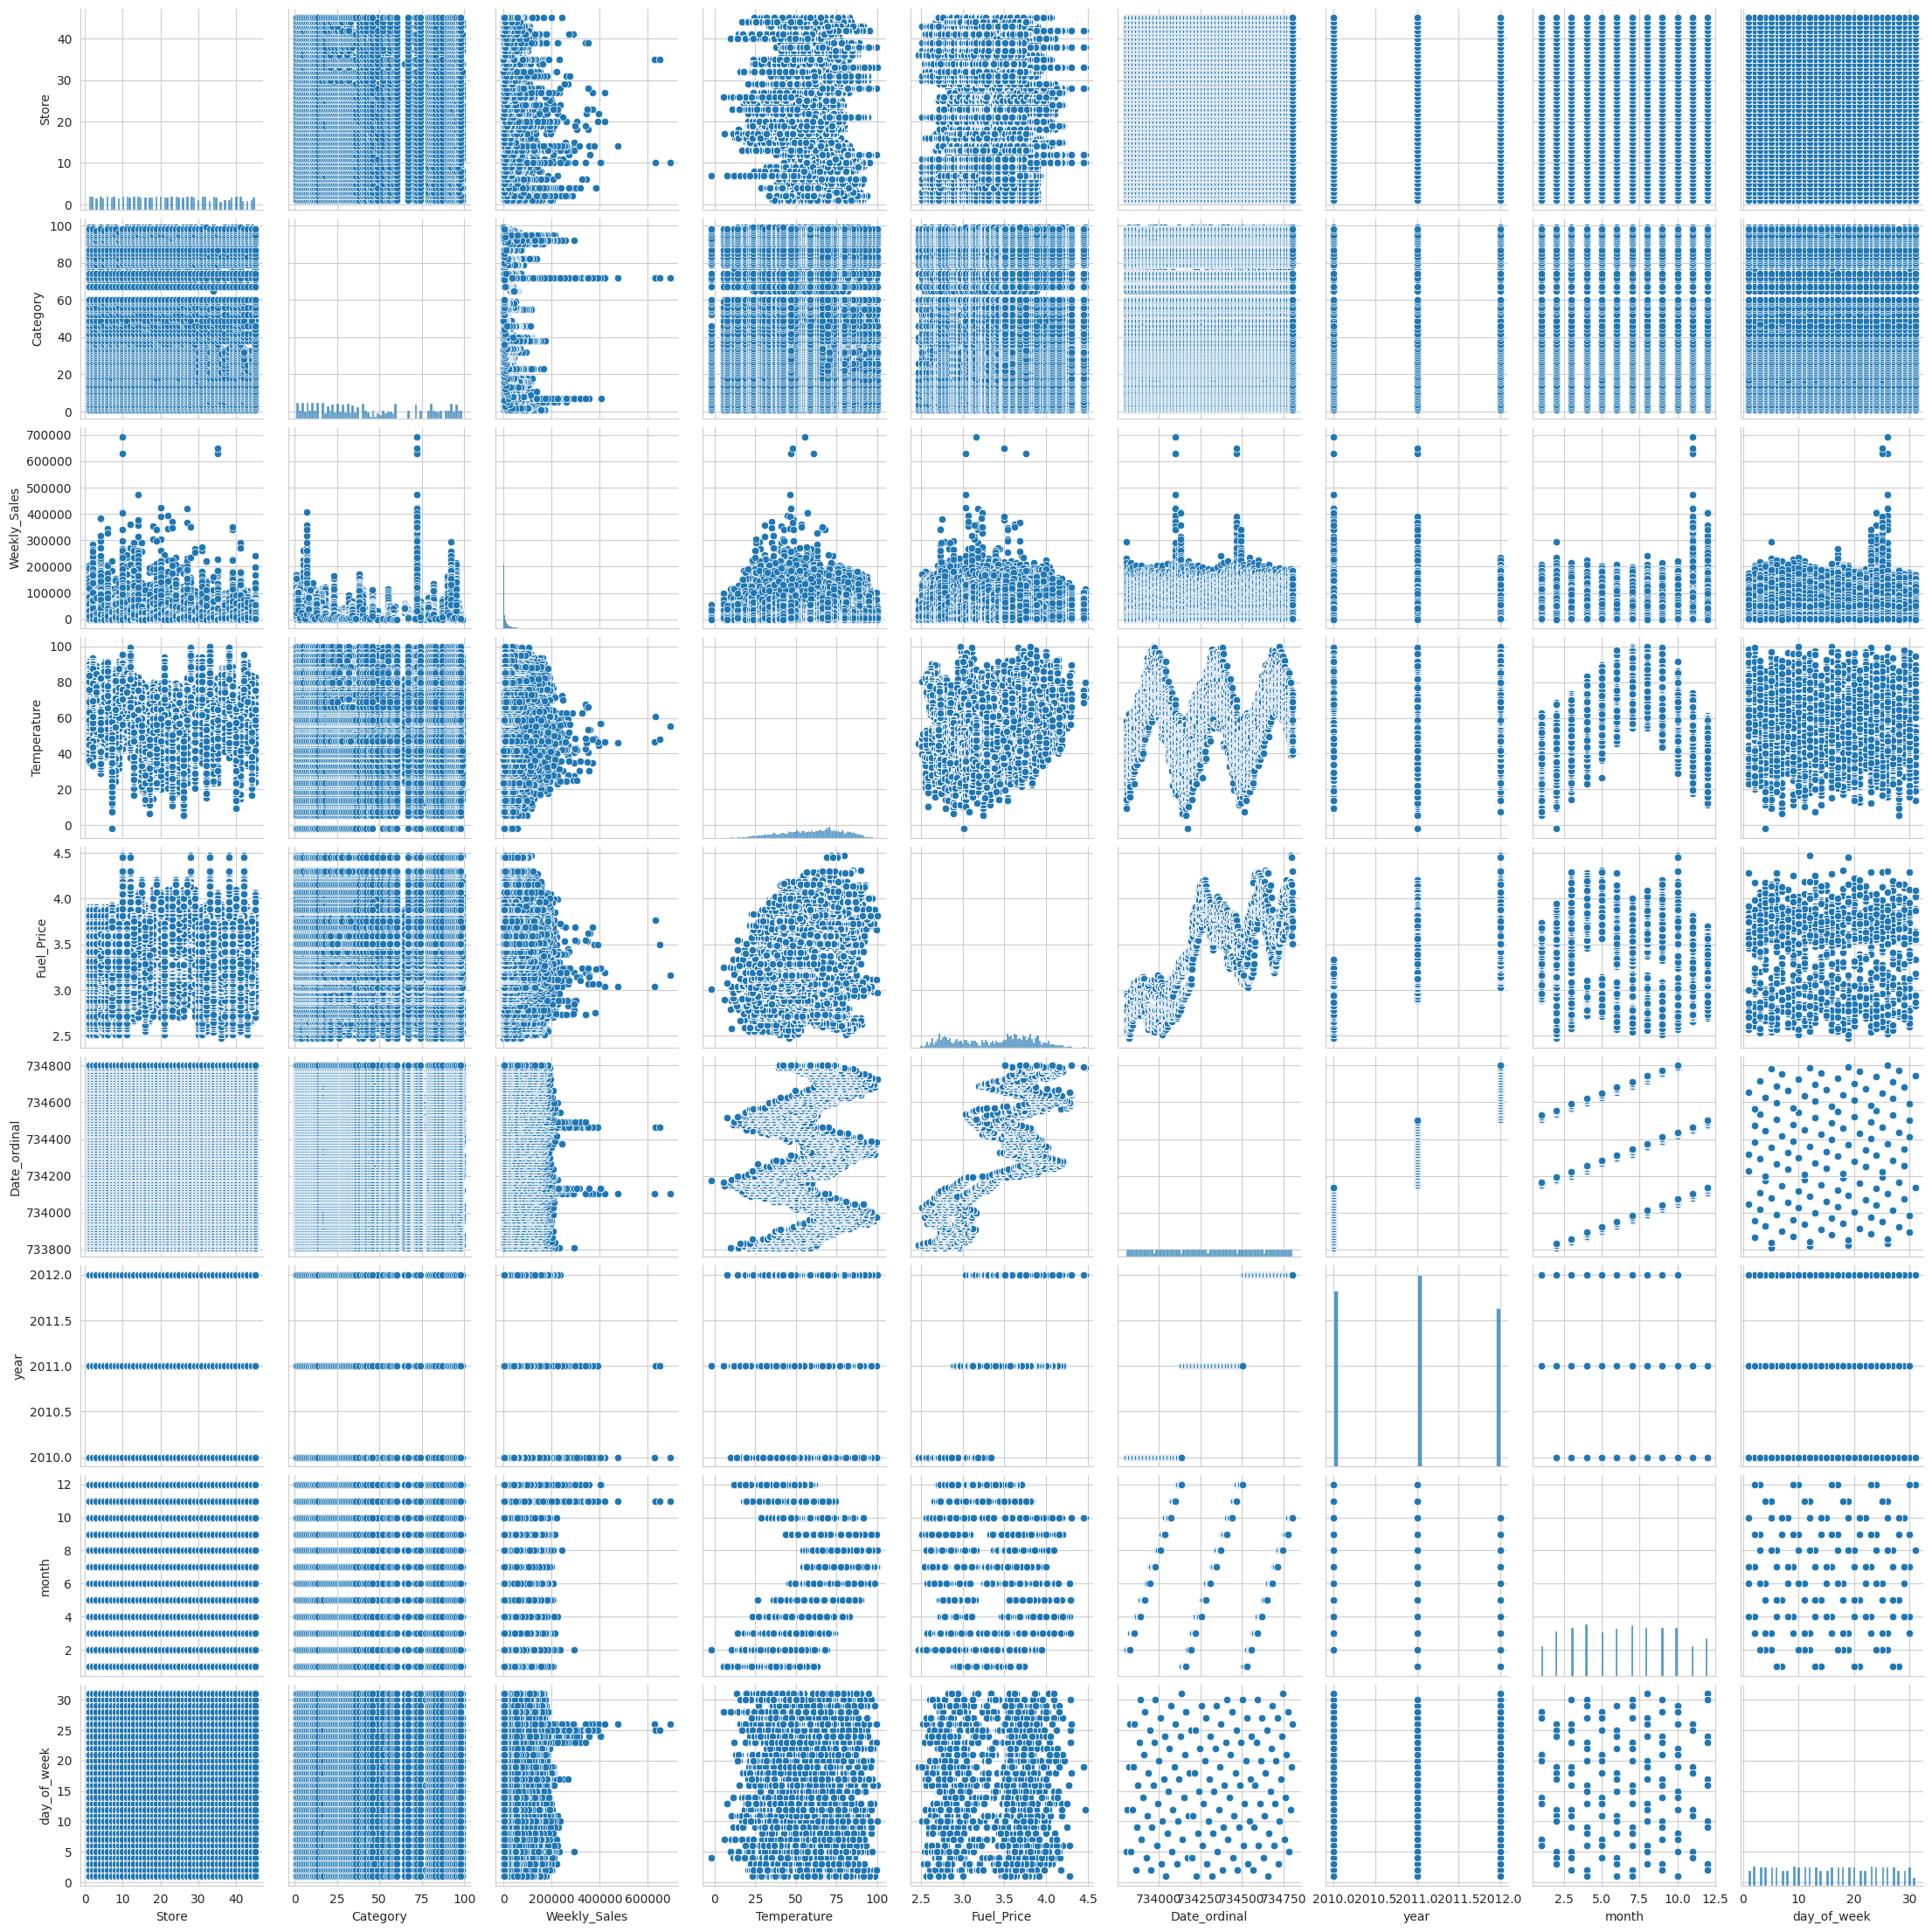

In [258]:
# task 2.9
numeric_cols = merged_df.select_dtypes(include=[np.number])
sns.pairplot(numeric_cols)
plt.show()

In [259]:
numeric_cols

,Store,Category,Weekly_Sales,Temperature,Fuel_Price,Date_ordinal,year,month,day_of_week
0,1,1.0,24924.50,42.31,2.572,733808,2010,2,5
1,1,2.0,50605.27,42.31,2.572,733808,2010,2,5
2,1,3.0,13740.12,42.31,2.572,733808,2010,2,5
3,1,4.0,39954.04,42.31,2.572,733808,2010,2,5
4,1,5.0,32229.38,42.31,2.572,733808,2010,2,5
...,...,...,...,...,...,...,...,...,...
419559,45,93.0,2487.80,58.85,3.882,734802,2012,10,26
419560,45,94.0,5203.31,58.85,3.882,734802,2012,10,26
419561,45,95.0,56017.47,58.85,3.882,734802,2012,10,26
419562,45,97.0,6817.48,58.85,3.882,734802,2012,10,26


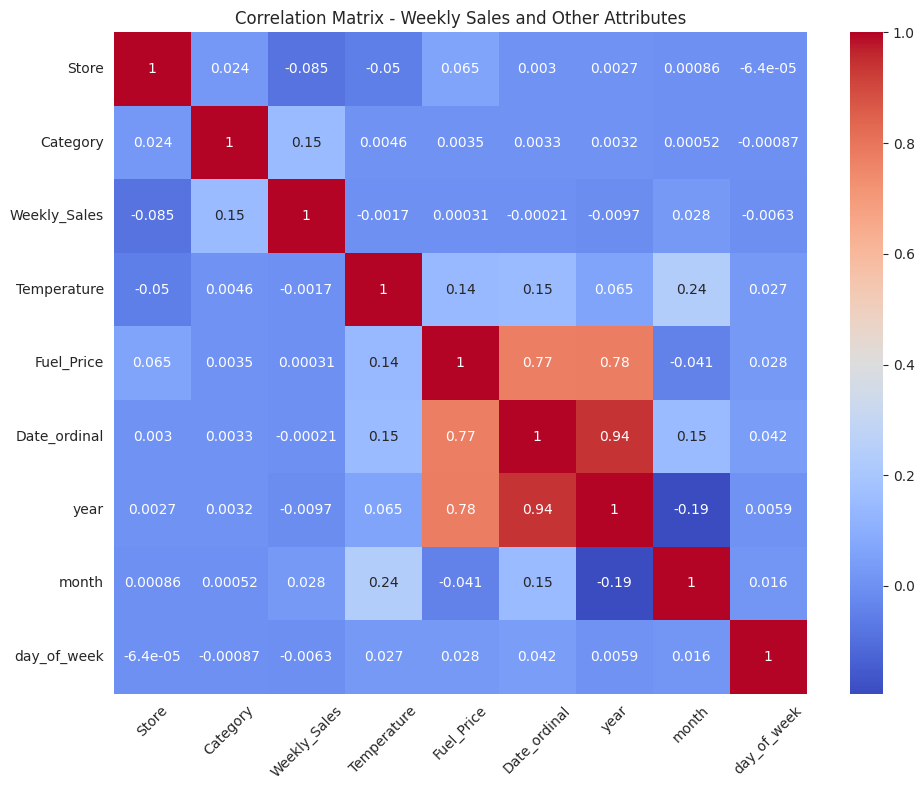

In [260]:
# 2.10 
correlation = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Weekly Sales and Other Attributes')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Correlation between the sales and [ day, fuel price, temperature , year ] is very low, thus they're not important features to be considering
### There's clear correlation between the sales and [ category, month, store no ], in which they will be the focus of our model

In [261]:
############### modeling ##################

In [262]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419564 entries, 0 to 419563
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         419564 non-null  int64  
 1   Category      419564 non-null  float64
 2   Weekly_Sales  419564 non-null  float64
 3   Holiday       419564 non-null  object 
 4   Temperature   419564 non-null  float64
 5   Fuel_Price    419564 non-null  float64
 6   Date_ordinal  419564 non-null  int64  
 7   year          419564 non-null  int32  
 8   month         419564 non-null  int32  
 9   day_of_week   419564 non-null  int32  
dtypes: float64(4), int32(3), int64(2), object(1)
memory usage: 30.4+ MB


In [263]:
from sklearn.model_selection import train_test_split

features = merged_df.drop(['Weekly_Sales','Temperature','Fuel_Price','day_of_week','year'], axis=1)
target = merged_df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [264]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [265]:
y_lr_train_pred = lr_model.predict(X_train)
y_lr_test_pred = lr_model.predict(X_test)

In [266]:
from sklearn.metrics import r2_score

lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [267]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_dt_train_pred = dt_model.predict(X_train)
dt_predictions = dt_model.predict(X_test)

dt_train_r2 = r2_score(y_train, y_lr_train_pred)
dt_r2_score = r2_score(y_test, dt_predictions)

In [268]:
print("Linear model score:",lr_test_r2*100,'%')
print("Decision tree regressor model score:", dt_r2_score *100,'%')

Linear model score: 3.055290210958783 %
Decision tree regressor model score: 94.23425520333132 %


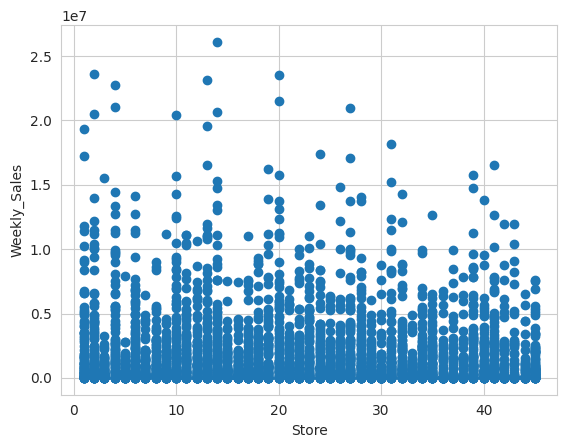

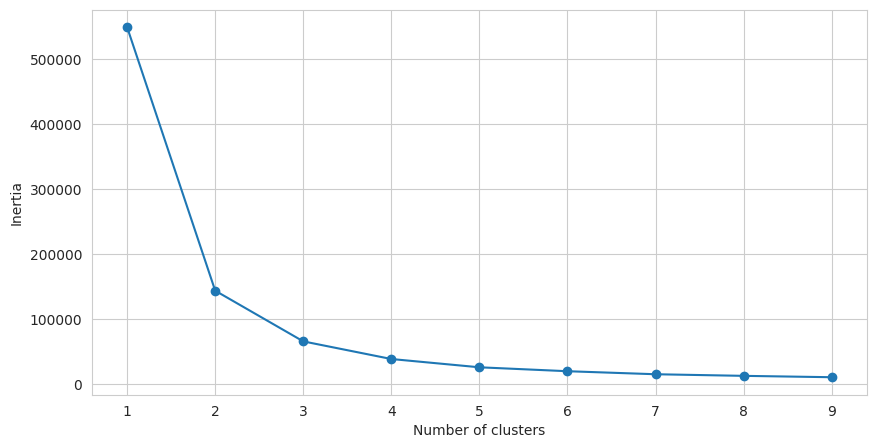

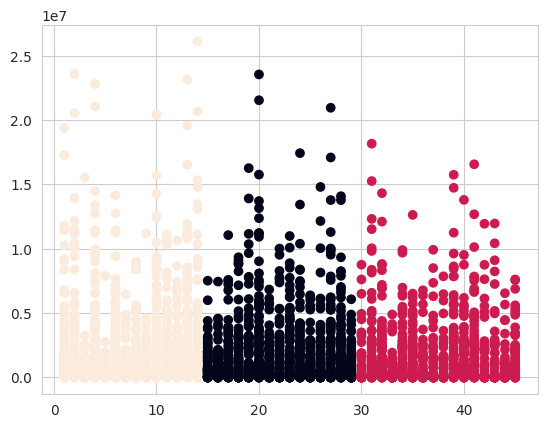

In [269]:
# 3.5 Clustering 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sales_metrics = merged_df.groupby(['Store', 'Category']).agg({'Weekly_Sales': 'sum'}).reset_index()
plt.scatter(sales_metrics['Store'],sales_metrics.Weekly_Sales)
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
scaler = StandardScaler()
sales_metrics[['Weekly_Sales_T']] = scaler.fit_transform(sales_metrics[['Weekly_Sales']])

def optimise_k_means(data,max_k):
    means = []
    inertias = []
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()
optimise_k_means(sales_metrics[['Store' , 'Weekly_Sales_T']],10)
kmeans = KMeans(n_clusters=3)
kmeans.fit(sales_metrics[['Weekly_Sales_T' , 'Store']])
sales_metrics['Kmeans_3'] = kmeans.labels_
plt.scatter(x=sales_metrics['Store'] , y =sales_metrics['Weekly_Sales'],c=sales_metrics['Kmeans_3'])
plt.show()

## The inertia decreases sharply until 3 clusters and then the rate of decrease slows down. In this case, 3 clusters would be the optimal number because it captures most of the variability in the data while keeping the model relatively simple.